In [1]:
import cv2, os, glob, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from tkinter import Tk, filedialog
from sklearn.svm import SVC

In [2]:
RAW_DIR     = r"Dataset - Copy"
PROC_DIR    = r"resized-images"          
TARGET_SIZE = (64*2, 64*2)               

X, y = [], []                         

for person in os.listdir(RAW_DIR):
    os.makedirs(f"{PROC_DIR}/{person}", exist_ok=True)
    for fn in glob.glob(f"{RAW_DIR}/{person}/*"):
        img = cv2.imread(fn)                          
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        resized = cv2.resize(gray, TARGET_SIZE,
                             interpolation=cv2.INTER_AREA)

        
        out_path = f"{PROC_DIR}/{person}/{os.path.basename(fn)}"
        cv2.imwrite(out_path, resized)

        X.append(resized.flatten())   
        y.append(person)              


In [3]:
    le    = LabelEncoder()
    ye = le.fit_transform(y)      


In [4]:
print(y)

['Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Abdulla', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Aldo', 'Gus', 'Gus', 'Gus', 'Gus', 'Gus', 'Gus', 'Gus', 'Gus', 'Gus', 'Gus', 'Isai', 'Isai', 'Isai', 'Isai', 'Isai', 'Isai', 'Isai', 'Isai', 'Isai', 'Isai', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Isaias', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Jacque', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Lalo', 'Luis', 'Luis', 'Luis', 'Luis', 'Luis', 'Luis', 'Luis', 'Luis', 'Luis', 'Luis', 'Maik', 'Maik', 'Maik', 'Maik', 'Maik', 'Maik', 'Maik', 'Maik', 'Maik', 'Maik', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Nestor', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ricardo', 'Ruben', 

In [5]:
print(ye)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13]


In [6]:
X = np.asarray(X, dtype=np.float32)
y = np.asarray(ye)


X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y)

In [7]:
y_test

array([ 9,  7, 11, 10,  6,  6,  1,  1,  8,  7,  4,  0,  4, 13,  0,  5,  3,
        9, 10,  2, 11,  2,  5,  3,  8, 12, 12, 13])

In [8]:
le.inverse_transform(y_test)

array(['Nestor', 'Luis', 'Ruben', 'Ricardo', 'Lalo', 'Lalo', 'Aldo',
       'Aldo', 'Maik', 'Luis', 'Isaias', 'Abdulla', 'Isaias', 'Yoriko',
       'Abdulla', 'Jacque', 'Isai', 'Nestor', 'Ricardo', 'Gus', 'Ruben',
       'Gus', 'Jacque', 'Isai', 'Maik', 'Spencer', 'Spencer', 'Yoriko'],
      dtype='<U7')

In [9]:
pipe = make_pipeline(
        StandardScaler(),                 
        PCA(n_components=0.99, whiten=True), 
        
    LogisticRegression(
            solver='lbfgs',               
            max_iter=10000,               
            n_jobs=-1 )                   
        #SVC(kernel='linear')
        
)

pipe.fit(X_train, y_train)
'''
y_pred = pipe.predict(X_test)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

print(classification_report(le.inverse_transform(y_test), le.inverse_transform(pipe.predict(X_test))))
'''

'\ny_pred = pipe.predict(X_test)\nprint(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))\n\nprint(classification_report(le.inverse_transform(y_test), le.inverse_transform(pipe.predict(X_test))))\n'

In [10]:

k = 3
cv = StratifiedKFold(n_splits=k, shuffle=True)


f1_per_fold = cross_val_score(pipe, X_train, y_train,
                              cv=cv, scoring='f1_macro')

print(f"Macro-F1 per fold: {np.round(f1_per_fold,3)}")
print(f"Mean ± std        : {f1_per_fold.mean():.3f} ± {f1_per_fold.std():.3f}")


y_train_pred = cross_val_predict(pipe, X_train, y_train,
                                 cv=cv, n_jobs=-1)

print("\n=== Cross-validated train report ===")
print(classification_report(le.inverse_transform(y_train),
                            le.inverse_transform(y_train_pred)))

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)

print("\n=== Test-set report ===")
print(classification_report(le.inverse_transform(y_test),
                            le.inverse_transform(y_test_pred)))

Macro-F1 per fold: [0.499 0.557 0.558]
Mean ± std        : 0.538 ± 0.027

=== Cross-validated train report ===
              precision    recall  f1-score   support

     Abdulla       0.86      0.75      0.80         8
        Aldo       0.80      0.50      0.62         8
         Gus       0.62      0.62      0.62         8
        Isai       0.36      0.50      0.42         8
      Isaias       0.25      0.12      0.17         8
      Jacque       0.40      0.50      0.44         8
        Lalo       0.50      0.62      0.56         8
        Luis       0.33      0.25      0.29         8
        Maik       1.00      0.38      0.55         8
      Nestor       0.40      0.50      0.44         8
     Ricardo       0.31      0.50      0.38         8
       Ruben       0.71      0.62      0.67         8
     Spencer       0.50      0.62      0.56         8
      Yoriko       0.88      0.88      0.88         8

    accuracy                           0.53       112
   macro avg       0.57

/home/rogg14/anaconda3/envs/deepLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rogg14/anaconda3/envs/deepLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rogg14/anaconda3/envs/deepLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [11]:
acc = accuracy_score(y_test, y_test_pred)
acc

0.75

In [12]:
pca = PCA(n_components=0.99, whiten= True)
pca.fit(X_train)

PCA(n_components=0.99, whiten=True)

Text(0.5, 1.0, 'Average Face')

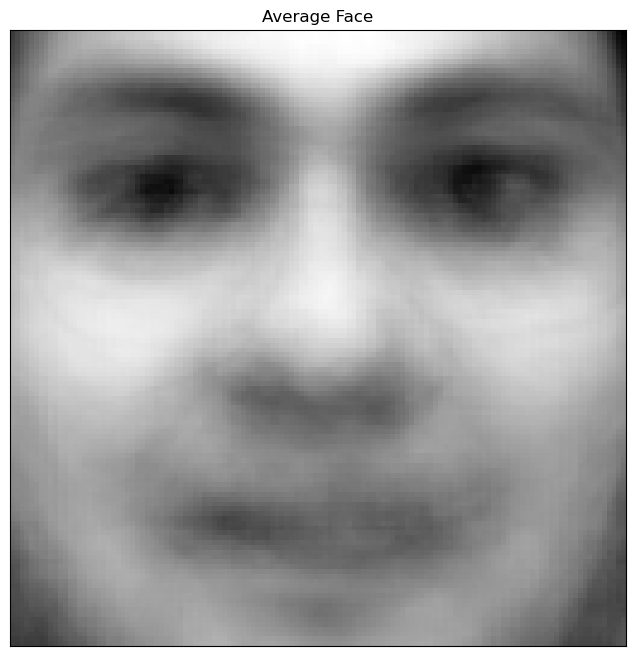

In [13]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64*2,64*2)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [14]:
len(pca.components_)

94

Text(0.5, 0.98, 'All Eigen Faces')

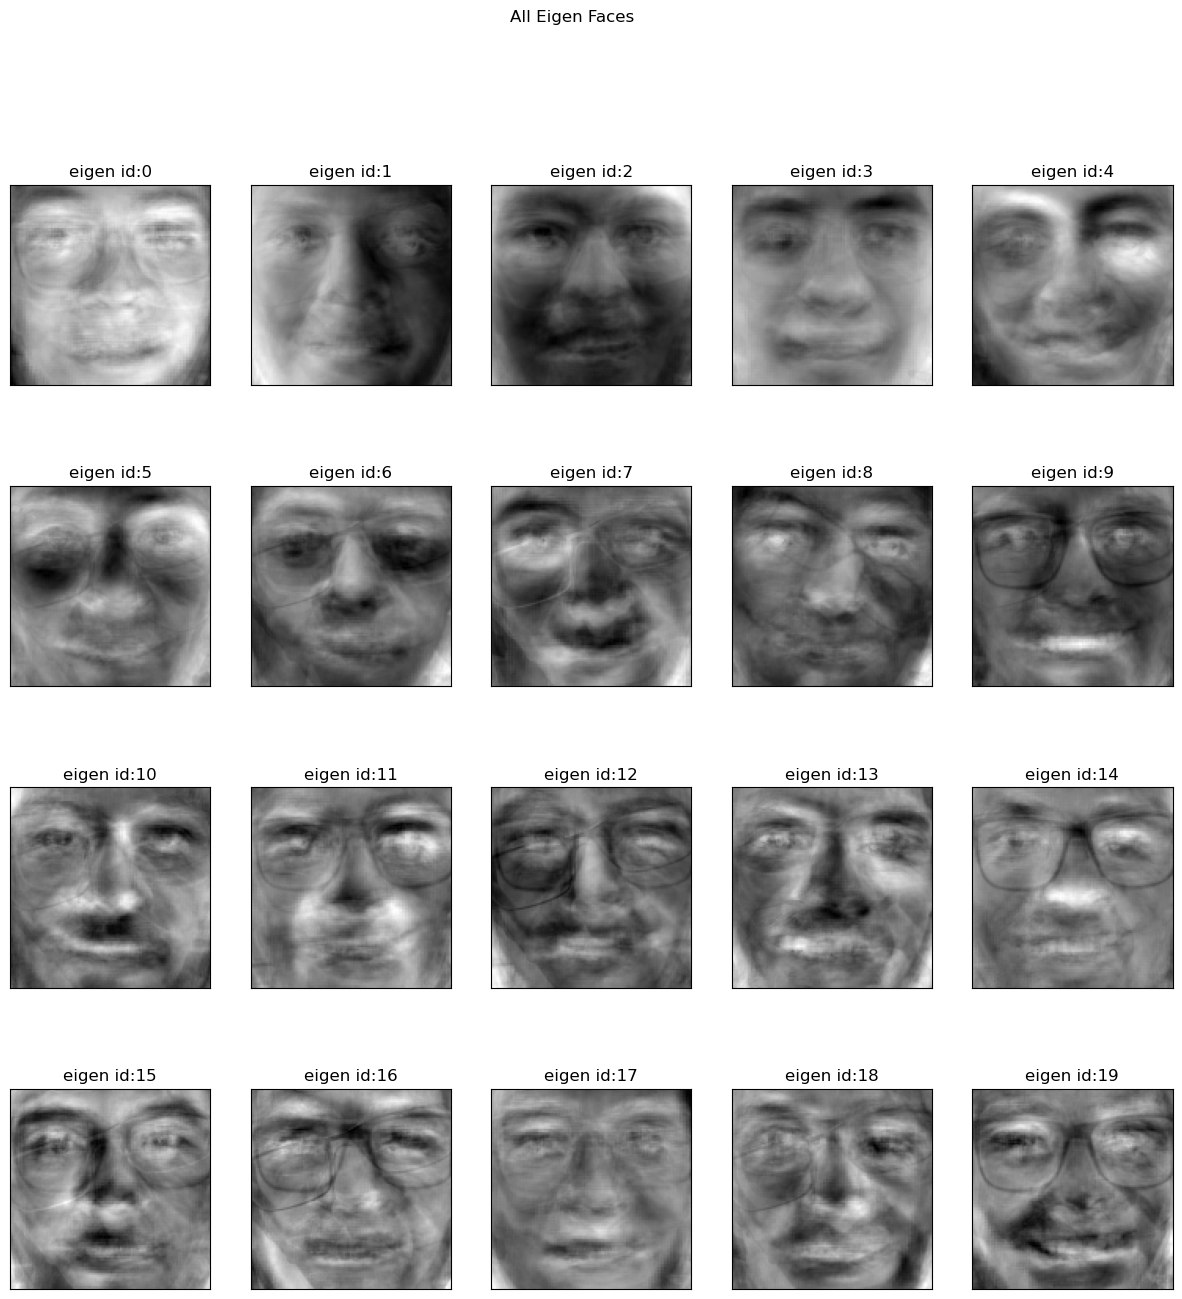

In [15]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64*2, 64*2))

cols=5
rows=4
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(20):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

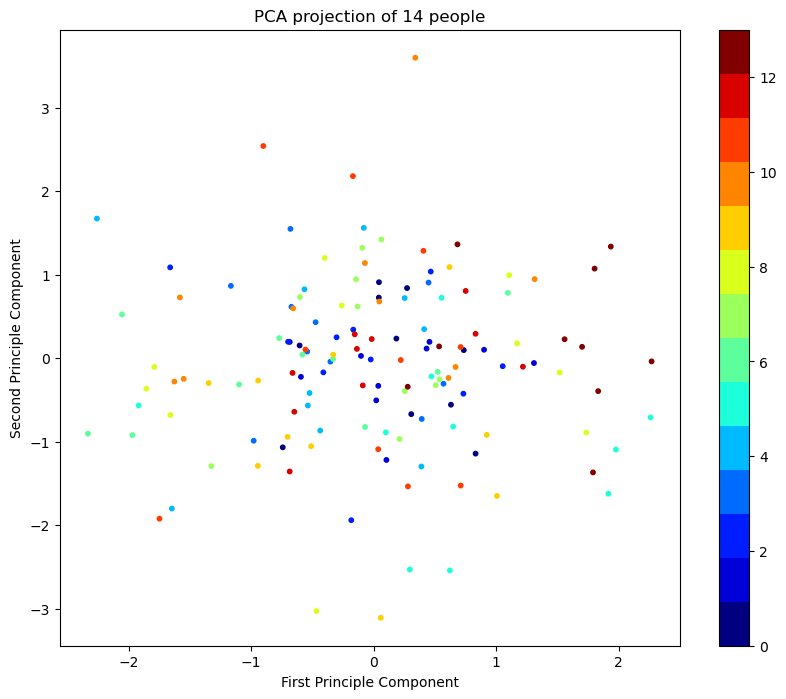

In [16]:
X_pca = pca.transform(X)
number_of_people=14
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=ye[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

In [17]:
y_test

array([ 9,  7, 11, 10,  6,  6,  1,  1,  8,  7,  4,  0,  4, 13,  0,  5,  3,
        9, 10,  2, 11,  2,  5,  3,  8, 12, 12, 13])

In [18]:
le.inverse_transform(y_test)

array(['Nestor', 'Luis', 'Ruben', 'Ricardo', 'Lalo', 'Lalo', 'Aldo',
       'Aldo', 'Maik', 'Luis', 'Isaias', 'Abdulla', 'Isaias', 'Yoriko',
       'Abdulla', 'Jacque', 'Isai', 'Nestor', 'Ricardo', 'Gus', 'Ruben',
       'Gus', 'Jacque', 'Isai', 'Maik', 'Spencer', 'Spencer', 'Yoriko'],
      dtype='<U7')

In [19]:
le.inverse_transform(y_test_pred)

array(['Nestor', 'Luis', 'Ruben', 'Ricardo', 'Lalo', 'Lalo', 'Aldo',
       'Spencer', 'Ruben', 'Ruben', 'Isaias', 'Abdulla', 'Isaias',
       'Yoriko', 'Abdulla', 'Jacque', 'Isai', 'Nestor', 'Isai', 'Luis',
       'Ruben', 'Gus', 'Jacque', 'Isai', 'Nestor', 'Spencer', 'Spencer',
       'Nestor'], dtype='<U7')

<Axes: >

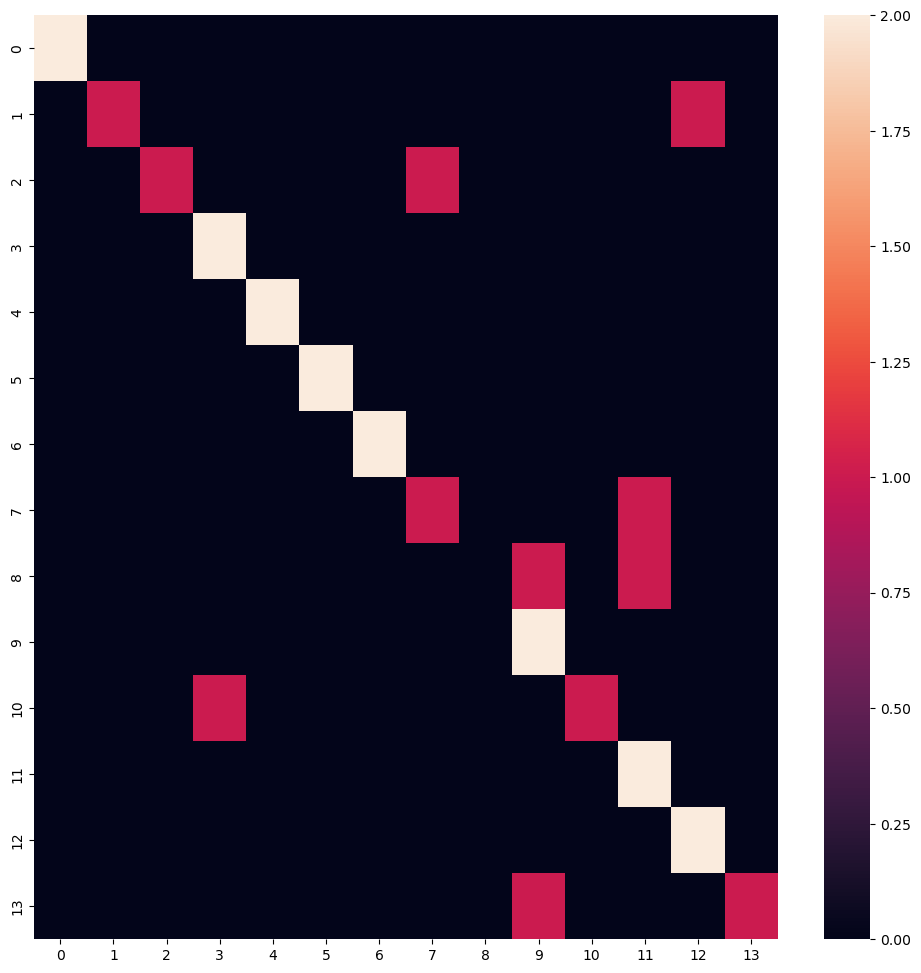

In [20]:
cm=confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_test_pred))

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [63]:

Tk().withdraw()                
file_path = filedialog.askopenfilename(
                title="Choose an image",
                filetypes=[("Images", "*.jpg *.jpeg *.png *.bmp *.tiff"), 
                           ("All files", "*.*")])

if not file_path:
    raise SystemExit("No file selected – aborted.")


img_bgr = cv2.imread(file_path)
if img_bgr is None:
    raise ValueError("Could not read the image – check the file type.")


img_gray   = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_res128 = cv2.resize(img_gray, (128, 128), interpolation=cv2.INTER_AREA)


cv2.imshow("Original", img_bgr)
cv2.imshow("Gray 128x128", img_res128)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
le.inverse_transform(pipe.predict([img_res128.flatten()]))

array(['Ruben'], dtype='<U7')